In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define model
model = Sequential([
    Input(shape=(28, 28, 1)),            
    Conv2D(32, (3, 3), activation='relu'),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
history = model.fit(train_images, train_labels, 
                    epochs=5, 
                    batch_size=64, 
                    validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8823 - loss: 0.3823 - val_accuracy: 0.9765 - val_loss: 0.0815
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9556 - loss: 0.1476 - val_accuracy: 0.9806 - val_loss: 0.0605
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9650 - loss: 0.1154 - val_accuracy: 0.9853 - val_loss: 0.0516
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9721 - loss: 0.0938 - val_accuracy: 0.9852 - val_loss: 0.0481
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9761 - loss: 0.0788 - val_accuracy: 0.9879 - val_loss: 0.0427


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"\n Test accuracy: {test_acc:.4f}") 
print(f" Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0335

 Test accuracy: 0.9889
 Test loss: 0.0335


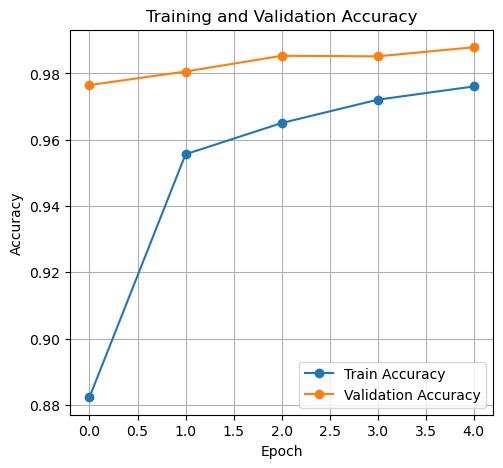

In [14]:
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o') 
plt.title('Training and Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.grid(True)

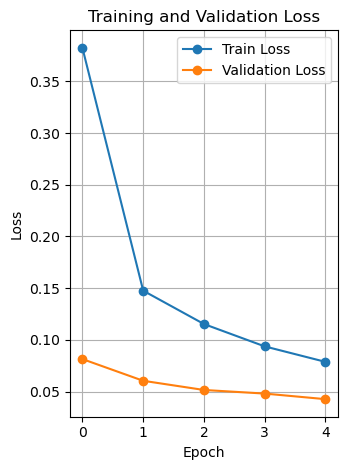

In [15]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss', marker='o') 
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o') 
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [16]:
predictions = model.predict(test_images) 
predicted_labels = np.argmax(predictions, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [17]:
num_samples = 10 
plt.figure(figsize=(15, 4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

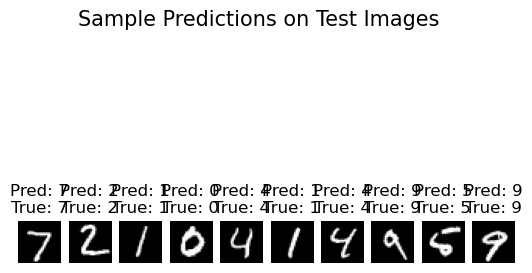

In [18]:
for i in range(num_samples): 
    plt.subplot(1, num_samples, i + 1) 
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray') 
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}") 
    plt.axis('off') 
plt.suptitle("Sample Predictions on Test Images", fontsize=15) 
plt.show()